# Predicting Type of Chest Pain Using Age, Serum Cholesterol Levels, Resting Blood Pressure and Maximum Heart Rate as Predictors


Heart (Cardiovascular) disease, a condition that affects the heart and blood vessels, is the leading cause of mortality worldwide, accounting for 1 in 6 deaths. Angina, a type of chest pain resulting from decreased blood flow to the heart, serves as an indicator of an individual's risk of heart attack and stroke. Notably, the risk factors for heart disease are closely associated with the experience of anginal pain due to restricted blood flow to the heart. Elevated levels of cholesterol lead to the accumulation of plaque in arterial walls, a condition called atherosclerosis. Consequently, these plaques cause the arteries to narrow, further limiting blood flow to the heart. Both resting blood pressure and maximum heart rate are directly correlated with the volume of blood that the heart pumps and therefore, the quantity of blood that reaches the heart. 

We will use a classification model to answer the predictive question, "Can we use the predictors age, serum cholesterol levels, resting blood pressure, and maximum heart rate of a patient to predict whether a patient is experiencing anginal or non-anginal pain?” The dataset in use comprises heart disease data from Cleveland Clinic Foundation and was retrieved from the web. It was processed from a larger data set containing 76 raw attributes but only 14 were deemed useful. The data dictionary below shows a comprehensive list of these variables. 

| Variable | Description |
| -------- | ----------- | 
| age      | Age in Years |
| sex | Biological Sex (1 = male; 0 = female) | 
| cp | Value 1: Anginal pain, Value 2: Non-Anginal pain |
| trestbps | Resting blood pressure (mm Hg) |
| chol    | Serum cholesterol levels (mg/dl)|
| fbs | Fasting blood sugar > 120 mg/dl,  (1 = true; 0 = false) | 
| restecg | Resting electrocardiographic results | 
| thalach | Maximum heart rate achieved (bpm) |
| exang | Exercise induced angina | 
| oldpeak | ST depression induced by exercise relative to rest|
|slope | Slope of peak exercise segment |
| ca | Number of major vessels (0-3) colored by fluoroscopy |
| thal | 3 = normal; 6 = fixed defect; 7 = reversible defect | 
|num | Diagnosis of heart disease (angiographic disease status) - Value 0: < 50% diameter narrowing , Value 1: > 50% diameter narrowing |

Classification is the method of predicting which category a new observation falls into depending on its other variables (predictors). For our project, we will be analyzing data by training a K-nearest neighbour classifier model with a subset of the data and using this model to predict what type of chest pain the patient is experiencing. Classification will be a useful methodology as we can assign multiple variables to be used as predictors, assign the same weight to each variable, and get a predicted category. 
There are 14 different variables in the cleveland_data set which all provide information on factors associated with heart disease. We have chosen 4 variables that we deem to be the most useful in predicting type of chest pain. Diagnosing chest pain is a complex process as there are numerous factors that impact the patient's experience. Therefore, we have chosen multiple predictors in order to achieve a more accurate analysis of the factors causing chest pain. The required variables and categories to predict in our data analysis will be as follow:


| Variable | Type | Description | 
| -------- | ---- | ----------- | 
| Age(years) | Predictor  | Total length time a person has lived | 
| Serum cholesterol levels (mg/dl) | Predictor | Amount of total cholesterol in their blood | 
| Rest Blood Pressure (mm Hg)| Predictor  | Normal blood pressure level, standard of 120/80 mmHg | 
| Maximum Heart Rate Achieved (bpm) | Predictor | The highest number of beats per minute your heart can possibly reach |  
| Angina pain (1) | Level of Category to Predict |  Chest pain in patient; caused by reduced blood flow to the heart muscle | 
| Non anginal pain (2) | Level of Category to Predict| No chest pain in patient; the patient is healthy |




In [28]:
#Loading all necessary packages, reading dataset from web into R, combinging multiple levels of the categorical class and changing it to factor type

library(tidyverse)
library(readr)
library(tidymodels)
library(ggplot2)
library(cowplot)

options(repr.matrix.max.rows = 6)
set.seed(1)
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
cleveland_data <- read_csv(url, col_names = c("Age", "Sex", "Chest_Pain", "Rest_BP",
                                             "Cholesterol", "Fast_BS", "Rest_ECG", 
                                             "Max_HR", "Ex_Angina", "ST_Dep", "Slope",
                                             "Vessels", "Thal", "Disease_Presence")) |>
mutate(Chest_Pain = case_when(Chest_Pain <=2 ~ 1, 
          TRUE ~2))|>
mutate(Chest_Pain = as_factor(Chest_Pain))
cleveland_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Vessels, Thal
dbl (12): Age, Sex, Chest_Pain, Rest_BP, Cholesterol, Fast_BS, Rest_ECG, Max...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,Sex,Chest_Pain,Rest_BP,Cholesterol,Fast_BS,Rest_ECG,Max_HR,Ex_Angina,ST_Dep,Slope,Vessels,Thal,Disease_Presence
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,2,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,2,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,2,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,1,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,2,138,175,0,0,173,0,0.0,1,?,3.0,0


In [29]:
#Splitting data into training and testing sets
cleveland_split <- initial_split(cleveland_data, prop = 0.75, strata = Chest_Pain)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)

head(cleveland_train)
head(cleveland_test)

Age,Sex,Chest_Pain,Rest_BP,Cholesterol,Fast_BS,Rest_ECG,Max_HR,Ex_Angina,ST_Dep,Slope,Vessels,Thal,Disease_Presence
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
41,0,1,130,204,0,2,172,0,1.4,1,0.0,3.0,0
48,1,1,110,229,0,0,168,0,1.0,3,0.0,7.0,1
49,1,1,130,266,0,0,171,0,0.6,1,0.0,3.0,0
58,0,1,150,283,1,2,162,0,1.0,1,0.0,3.0,0
58,1,1,120,284,0,2,160,0,1.8,2,0.0,3.0,1


Age,Sex,Chest_Pain,Rest_BP,Cholesterol,Fast_BS,Rest_ECG,Max_HR,Ex_Angina,ST_Dep,Slope,Vessels,Thal,Disease_Presence
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
37,1,2,130,250,0,0,187,0,3.5,3,0.0,3.0,0
56,1,1,120,236,0,0,178,0,0.8,1,0.0,3.0,0
53,1,2,140,203,1,2,155,1,3.1,3,0.0,7.0,1
57,1,2,140,192,0,0,148,0,0.4,2,0.0,6.0,0
56,0,1,140,294,0,2,153,0,1.3,2,0.0,3.0,0
44,1,1,120,263,0,0,173,0,0.0,1,0.0,7.0,0


In [30]:
#There are not any rows with missing data

#Table 1 Count and percentage for each category of chestpain
print("Table 1 : Count and Percentage of Each Category of Chest Pain in Training Data")
num_obs <- nrow(cleveland_train)
cleveland_train|>
group_by(Chest_Pain)|>
summarize(count = n(), percentage = n()/num_obs*100)


[1] "Table 1 : Count and Percentage of Each Category of Chest Pain in Training Data"


Chest_Pain,count,percentage
<fct>,<int>,<dbl>
1,54,23.89381
2,172,76.10619


In [31]:
#Table 2 mean values for the predictor of each category of chestpain
print("Table 2 : Mean Values of Each Predictor Variable by Level of Chest Pain")
cleveland_train|>
group_by(Chest_Pain)|>
summarize(Average_Age = mean(Age), Average_Cholesterol = mean(Cholesterol), average_Rest_BP = mean(Rest_BP), average_Max_HR = mean(Max_HR))

[1] "Table 2 : Mean Values of Each Predictor Variable by Level of Chest Pain"


Chest_Pain,Average_Age,Average_Cholesterol,average_Rest_BP,average_Max_HR
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,52.72222,247.1296,134.6111,162.0185
2,54.86047,249.1744,131.0349,145.2616


In [32]:
#Visualization of cholesterol and age
age_choles <- cleveland_train |>
    ggplot(aes(x = Age, y = Cholesterol, color = Chest_Pain))+
    geom_point()+
    labs(x = "Age (years)", y = "Cholesterol (mg/dL)", color = "Types of Chest Pain")+
    scale_color_manual(labels = c("Anginal Pain", "Non-Anginal Pain"),
                        values = c("orange2", "steelblue"))+
theme(text = element_text(size = 18))

In [33]:
#Visualization of age with Resting Blood Pressure
age_bp <- cleveland_train |>
    ggplot(aes(x = Age, y = Rest_BP, color = Chest_Pain))+
    geom_point()+
    labs(x = "Age (years)", y = "Rest Blood Pressure (mm Hg) ", color = "Types of Chest Pain")+
    scale_color_manual(labels = c("Anginal Pain", "Non-Anginal Pain"),
                        values = c("orange2", "steelblue"))+
theme(text = element_text(size = 18))

In [34]:
#Visualization between age and max heart rate achieve
age_hr <- cleveland_train |>
    ggplot(aes(x = Age, y = Max_HR, color = Chest_Pain))+
    geom_point()+
    labs(x = "Age (years)", y = "Maximum Heart Rate Achieved (bpm)", color = "Types of Chest Pain")+
    scale_color_manual(labels = c("Anginal Pain", "Non-Anginal Pain"),
                        values = c("orange2", "steelblue"))+
theme(text = element_text(size = 18))

In [35]:
#Visualization of Cholesterol with Resting Blood Pressure
choles_bp <- cleveland_train |>
    ggplot(aes(x = Cholesterol, y = Rest_BP, color = Chest_Pain))+
    geom_point()+
    labs(x ="Cholesterol (mg/dL)", y = "Rest Blood Pressure (mm Hg)", color = "Types of Chest Pain")+
    scale_color_manual(labels = c("Anginal Pain", "Non-Anginal Pain"),
                        values = c("orange2", "steelblue"))+
theme(text = element_text(size = 18))

In [36]:
#Visualization between cholesterol and max heart rate achieve
choles_hr <- cleveland_train |>
    ggplot(aes(x = Cholesterol, y = Max_HR, color = Chest_Pain))+
    geom_point()+
    labs(x = "Cholesterol (mg/dL)", y = "Maximum Heart Rate Achieved (bpm)", color = "Types of Chest Pain")+
    scale_color_manual(labels = c("Anginal Pain", "Non-Anginal Pain"),
                        values = c("orange2", "steelblue"))+
theme(text = element_text(size = 18))

In [37]:
#Visualization between Resting blood pressure and max heart rate achieve
bp_hr <- cleveland_train |>
    ggplot(aes(x = Rest_BP, y = Max_HR, color = Chest_Pain))+
    geom_point()+
    labs(x = "Rest Blood Pressure (mm Hg)", y = "Maximum Heart Rate Achieved (bpm)", color = "Types of Chest Pain")+
    scale_color_manual(labels = c("Anginal Pain", "Non-Anginal Pain"),
                        values = c("orange2", "steelblue"))+
theme(text = element_text(size = 18))

[1] "Figure 1 : Scatterplots of each combination of predictor variables coloured by the type of chest pain: anginal or non-anginal"


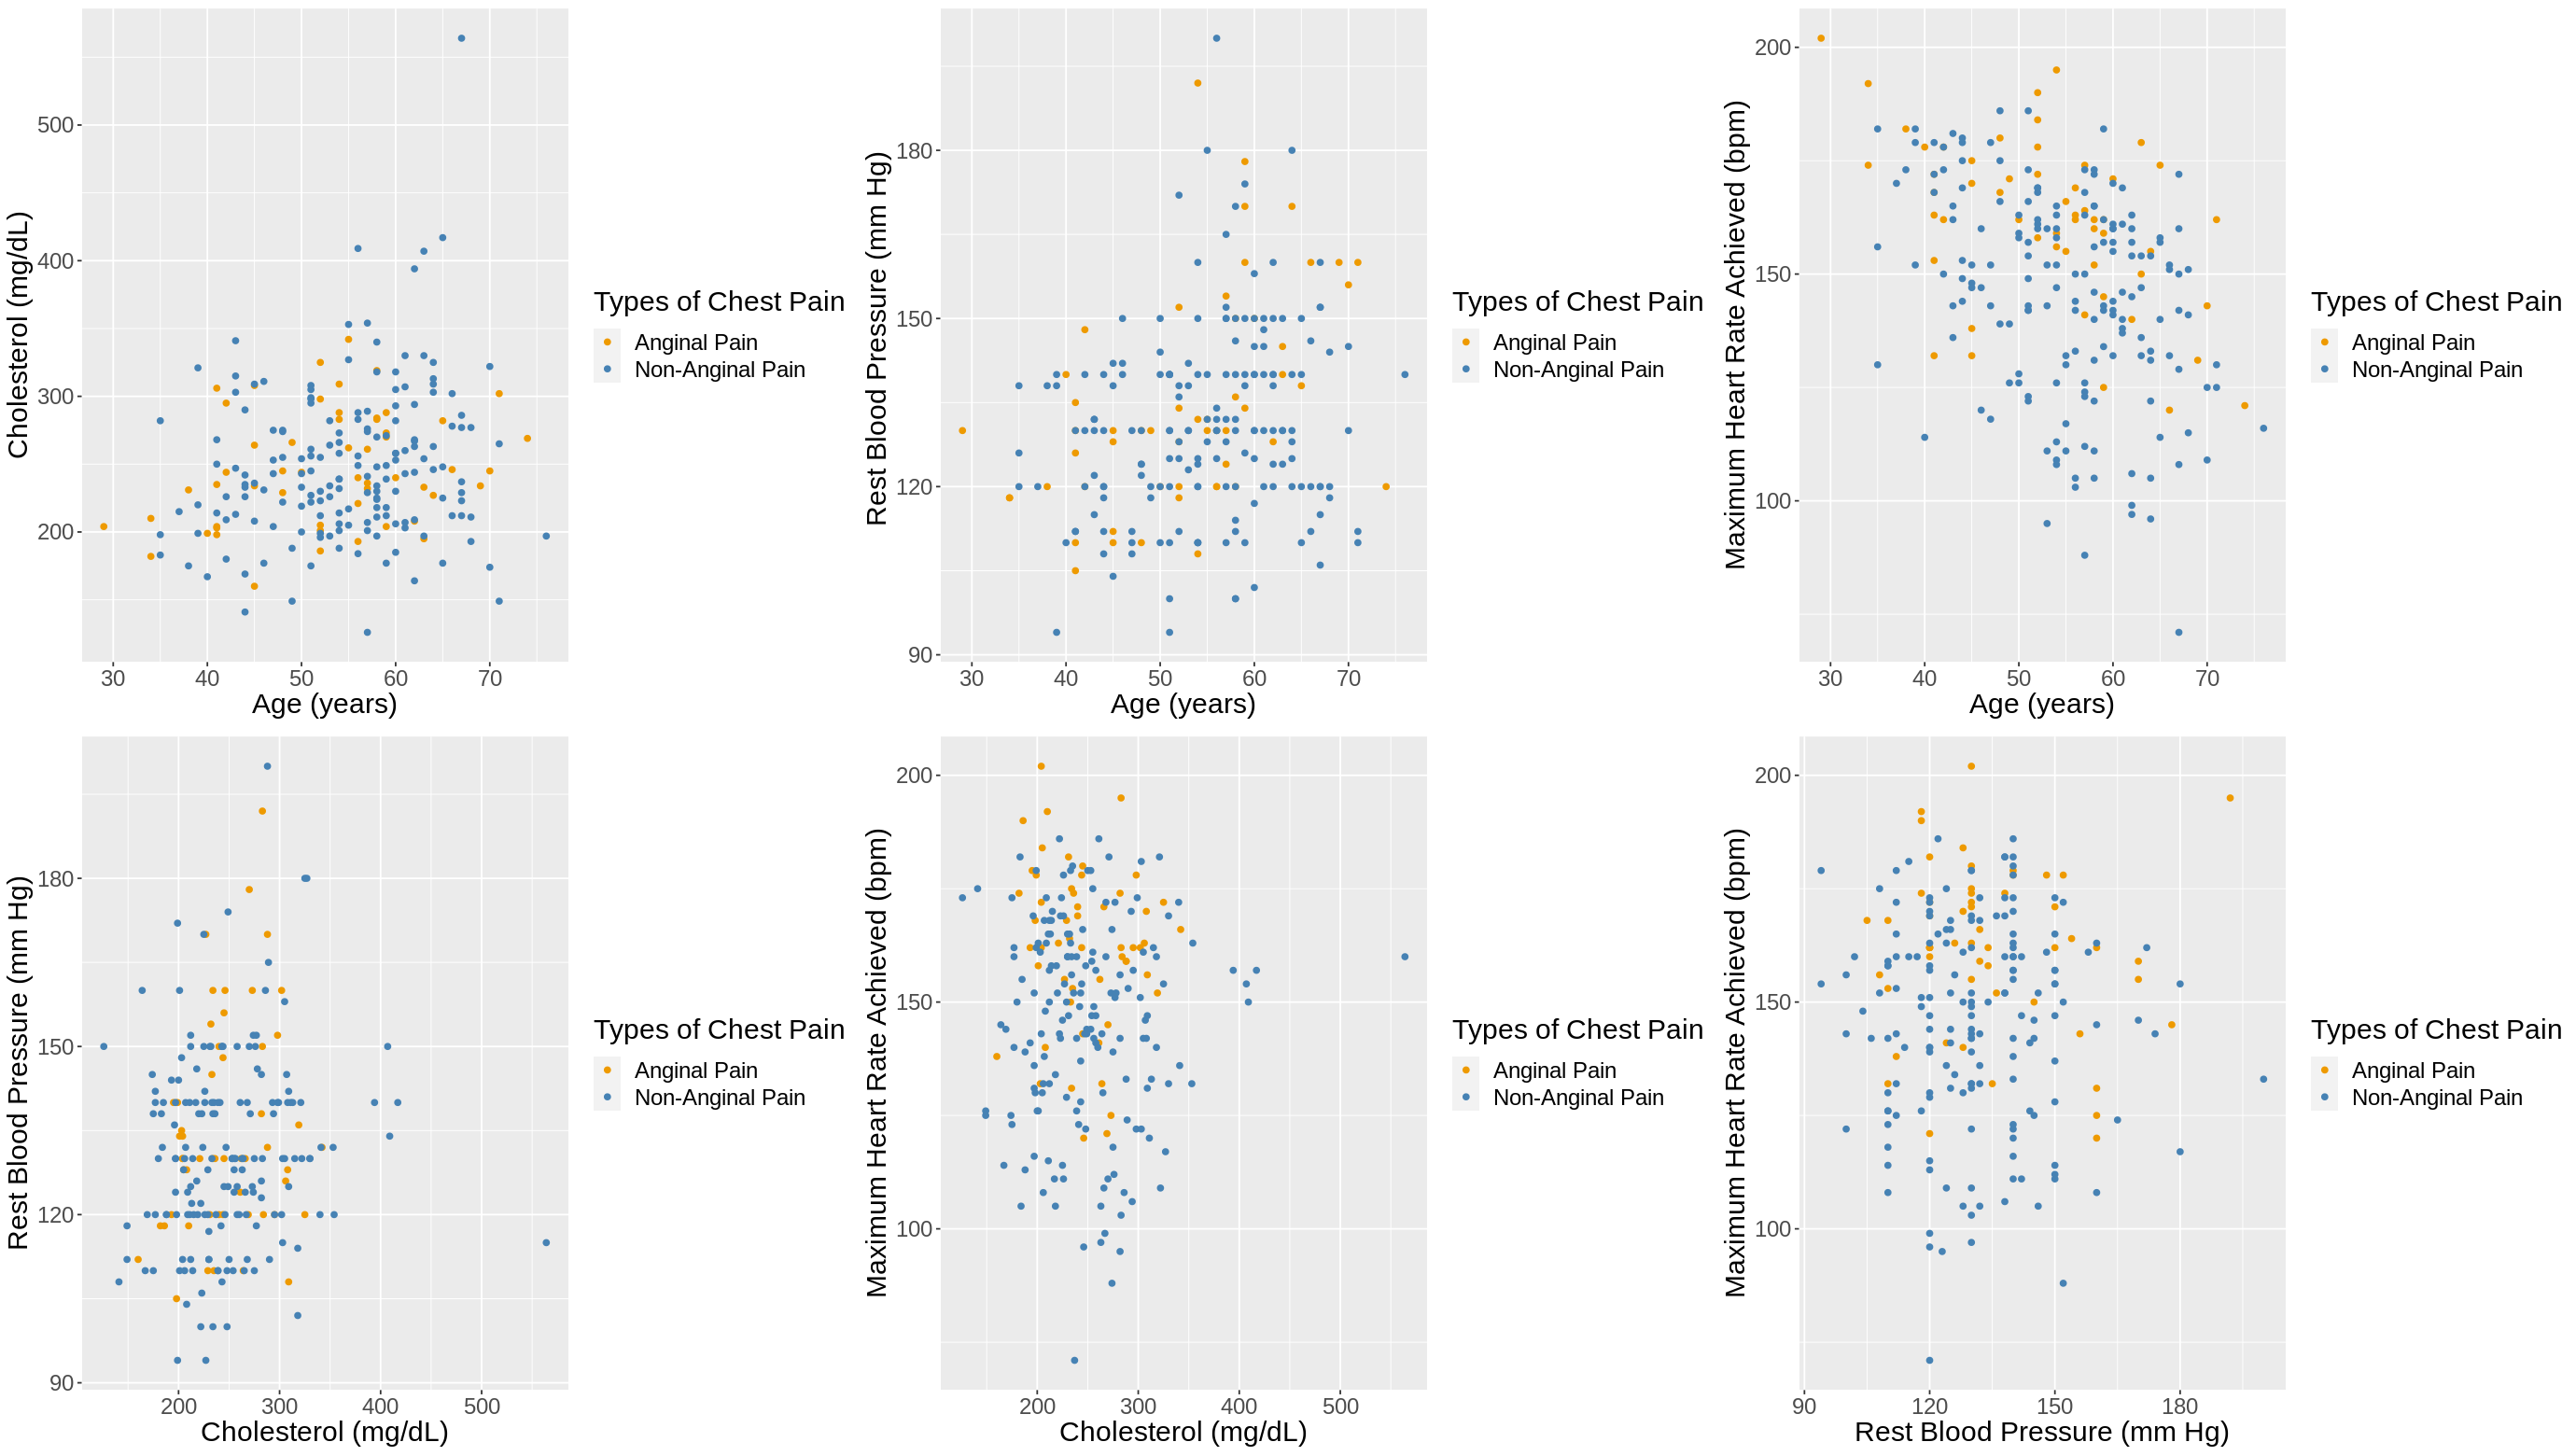

In [38]:
# All visualizations
print("Figure 1 : Scatterplots of each combination of predictor variables coloured by the type of chest pain: anginal or non-anginal")
options(repr.plot.width = 23, repr.plot.height = 13)
plot_grid(age_choles, age_bp, age_hr, choles_bp, choles_hr, bp_hr, ncol = 3) 


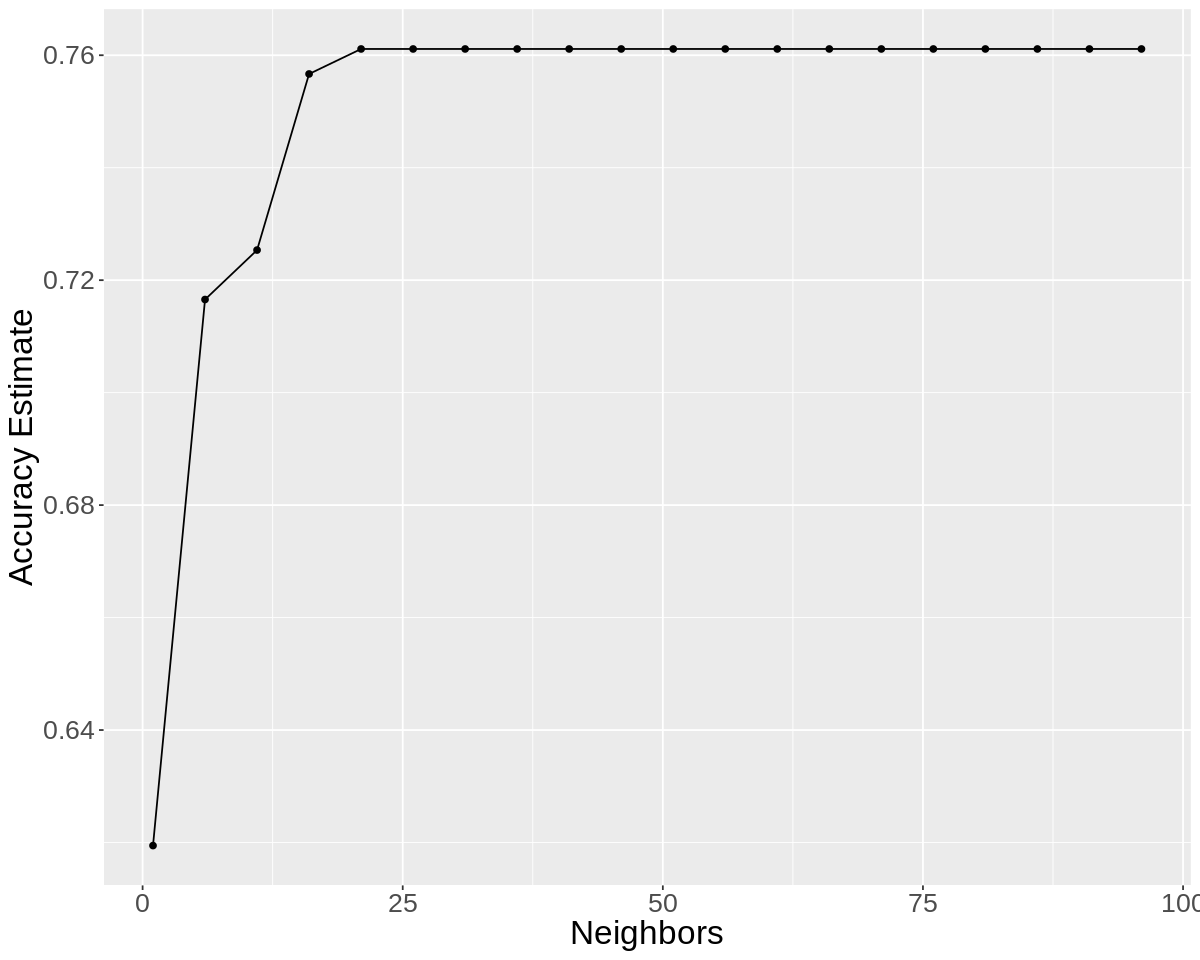

In [39]:
#Split up the data for cross validation
chest_pain_vfold <- vfold_cv(cleveland_train, v = 5, strata = Chest_Pain) 

#Create a recipe
chest_pain_recipe <- recipe(Chest_Pain ~ Cholesterol + Age + Rest_BP + Max_HR , 
                        data = cleveland_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors()) 

#create model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

#create the k values
k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

#Add the recipe and model to the workflow and perform cross validation
knn_results <- workflow() |>
  add_recipe(chest_pain_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = chest_pain_vfold, grid = k_vals) |>
  collect_metrics() 

accuracies <- knn_results |>
  filter(.metric == "accuracy")

#Pick the k value that is suitable by plotting the accuracy vs k
options(repr.plot.width = 10, repr.plot.height = 8)
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 20))
accuracy_vs_k


In [40]:
#Make a new model specification for the best K value
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 21) |>
    set_engine("kknn") |>
    set_mode("classification")

#Retrain the classifier
knn_fit <- workflow() |>
    add_recipe(chest_pain_recipe) |>
    add_model(knn_spec) |>
    fit(data = cleveland_train)

#Evaluate the estimated accuracy of the classifier
chest_pain_test_predictions <- predict(knn_fit, cleveland_test) |>
    bind_cols(cleveland_test)

#Find the accuracy
chest_pain_test_predictions |>
    metrics(truth = Chest_Pain, estimate = .pred_class) |>
    filter(.metric == "accuracy")

#Find the confusion matrix
confusion <- chest_pain_test_predictions |>
    conf_mat(truth = Chest_Pain, estimate = .pred_class)
confusion

               

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7402597


          Truth
Prediction  1  2
         1  0  1
         2 19 57

### Methods

We initially calculated the percentage of each type of chest pain in the training data set to ensure the data was balanced enough. 23.8% of the data was classified as anginal pain and 76.1% was classified as non-anginal pain; although not perfectly balanced, there was enough data points of the non-majority class to conitnue without oversampling this category. We then visualized each permutation of the four variables as scatter plots and colored by the type of chest pain to gain a preliminary understanding of the variation of each predictor variable. 

In order to acheive an accurate parameter value of K, we split up our training data to allow for cross-validation. After creating a recipe using standardized data, we created a model specification using K-nn classification. Adding the recipe and model to the workflow included performing cross-validation testing K values from 1-100 by 5. After filtering for accuracy, we plotted a graph to help visualize the optimal K-value. We updated the model specification with this K-value and retrained the classifier. After evaluating using the test data, we concluded by creating a confusion matrix to explain what types of mistakes the model had made. 


### Expected Outcomes and Significance

Our classification model predicting anignal or non-anginal chest pain based on the values of four predictor variables showed at accuracy of 74.02%. Unfourtuntely, this is much lower than we had expected before training the model. A majority classifier, which would predict the majority class of non-anginal pain for every data point, would have an accuracy of ~76%. As the two levels of chest pain did not differ significantly in their mean values of each predictor variable, we have concluded that this data set is not appropriated for a k-nn classification model. This is explained in the line graph of estimated accuracy versus number of neighbors. Typically, accuracy should start low, increase up to the optimal K-value, then decrease. Our graph, however, increases exponentially and then plateaus. Additionally, there was not a drastic separation between anginal and non-anginal chest pain in the preliminary visualizations we created, although since these only considered two variables we had hoped that including more variables would help distinguish the two levels. The model, however, showed that increasing the number of predictors did not establish a more distinct difference between the two levels of chest pain. Possible improvements to this model would focus on adjusting the predictor variable selection. For example, the average maximum heart rate of the two levels had a much larger difference than average cholesterol. Thus going forward, we could remove the variables like average cholesterol that do not seem to help differentiate between the two levels. Additionally, we could extend the preliminary visualizations to all 14 variables and pick the variables that appear to be the most influential. 


If these improvement suggestions result in a successful model, the impact of these findings could help doctors predict which patients are at a higher risk for heart attacks and strokes as anigna is correlated to occurence of these events. Cholesterol, age, resting blood pressure and maxium heart rate are easily measurable factors that a general care physician could measure in typical check ups. If heart attack and stroke risk can be determined from these factors, doctors can help their patients implement preventative measures prior to the health incidents' occurring. Due to the severity of heart disease, it is critical that doctors are able to provide preventative treatment as opposed to reactive treatment. Notably, 12% of patients who experience heart attacks pass away as a result of it. The ability to predict which patients are at a higher risk could save hundreds of thousands of lives each year. Fuuture questions could expand on our data exploration and investigate other factos associated with angina risk. For example, what is the threshold serum cholesterol level where patients experiencing chest pain will most likely be diagnosed with anginal pain? Another question is discovering the age ranges that are at risk of each type of chest pain. For example, what age group is most at risk for anginal chest pain? Due to the nature of anginal pain corresponding with heart disease, these questions are focussed on assesing the risks of anginal pain rather than non-anginal pain. 



### References
Data Set: Janosi, A., Steinbrunn, W., Pfisterer, M., &amp; Detrano, R. (1988). Heart Disease Data Set. UCI Machine Learning Repository. Retrieved April 13, 2023, from https://archive.ics.uci.edu/ml/datasets/Heart+Disease 


(1) Detrano , R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J. J., Sandhu, S., Guppy, K. H., Lee, S., &amp; Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. The American Journal of Cardiology. Retrieved April 13, 2023, from https://pubmed.ncbi.nlm.nih.gov/2756873/ 

(2) W. Aha, D., &amp; Kibler, D. (1989). Instance-based prediction of heart-disease presence with the Cleveland database. Cleveland Heart Disease Data. Retrieved April 13, 2023, from https://rdrr.io/cran/MixAll/man/HeartDisease.html 
